# Coursework 3 - Machine Learning

Please enter your name and student number into the Markdown cell below.

#### Name: Yuyang Zhang
#### Student Number:11169535

In this coursework we will explore some of the ideas from the session on Machine Learning. You will work with some randomly generated data and try out some approaches to supervised learning.

## Setup

Run the below cell to import some key modules.

In [1]:
# Import some modules that we will require
import numpy as np  
import scipy as sp
import sklearn # This is a module of machine learning tools

import matplotlib.pyplot as plt
%matplotlib inline

Please enter your Student ID in the cell below. This ID will be used throughout the coursework so please do not create any other variables named `ID`.

In [2]:
ID = 11169535

Now run the cell below. This will generate a set of data for you to use for the rest of this session. Each of you will obtain a different set of data.

## Part 1 - Exploring the SVM

In [3]:
np.random.seed(ID)
clustercentres = np.array([[0.5,0.65],[0.35,0.4]])
centreshifts = np.random.random((2,2))*0.02
clustercentres = clustercentres + centreshifts

noisescale = 0.25
nclasses = 2
npoints = 100
data = np.zeros((nclasses*npoints,2), dtype=float)
classes = np.zeros(nclasses*npoints, dtype=int)
for i in range(nclasses):
    for j in range(npoints):
        randomshift = np.random.random((2,))
        data[i*npoints+j,:] = clustercentres[i,:] + noisescale*randomshift[0]*np.array([np.sin(randomshift[1]*2*np.pi),np.cos(randomshift[1]*2*np.pi)])
        classes[i*npoints+j] = i

The data produced by the above cell consists of two clusters representing two classes of observations. The points in each cluster include some random noise.

#### <span style="color: red"> Task 1a:</span> Produce a scatter plot of your data with a different colour for each class (2 marks)
Also mark the centres of the clusters with a third symbol.

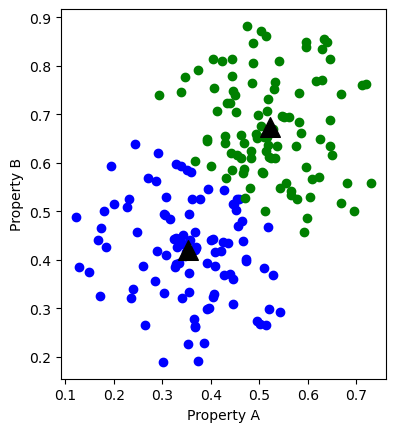

In [4]:
from sklearn.cluster import KMeans
nclusters = 2
kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(data)
color = ['b','g','r','y']
for s in range(nclusters):
    plt.scatter(data[(kmeans.labels_ == s),0],data[(kmeans.labels_ == s),1],marker='o', color=color[s])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^', color='k', s=200)
plt.xlabel('Property A')
plt.ylabel('Property B')
plt.gca().set_aspect('equal')

#### <span style="color: red"> Task 1b:</span> Split the data into a training set and a test set (2 marks)
[Hint:You will need to import something from sklearn to get this to work. See the class notebook for an example.]

In [5]:
from sklearn import model_selection
data_train, data_test, classes_train, classes_test = sklearn.model_selection.train_test_split(data, kmeans.labels_, stratify=kmeans.labels_, random_state=42)
print(str(np.size(data_train,0)) + ' elements in training set, ' + str(np.size(data_test,0)) + ' elements in test set.')

150 elements in training set, 50 elements in test set.


#### <span style="color: red"> Task 1c:</span> Train a support vector machine (svm) classifier using the training data (3 marks)
Use values of `kernel='rbf'`, `C=100.0` and `gamma=1.0`. [Hint: you will need to import something from sklearn.]

In [6]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=100, gamma=1.0).fit(data_train,classes_train)

#### <span style="color: red"> Task 1e:</span> Calculate the fraction of *training* points correctly classified by your SVM (2 marks)
Your cell should print the result of this calculation. [Hint: take a look at the class notebook to see how to use the SVM to predict classes.]

In [7]:
predictedclasses0 = svm.predict(data_train)
print('Percentage correctly classified in training set: ' + str(np.sum(classes_train==predictedclasses0)/np.size(classes_train)*100) + '%')

Percentage correctly classified in training set: 98.66666666666667%


#### <span style="color: red"> Task 1f:</span> Calculate the fraction of *test* points correctly classified by your SVM (1 mark)
Your cell should print the result of this calculation.

In [8]:
predictedclasses1 = svm.predict(data_test)
print('Percentage correctly classified in test set: ' + str(np.sum(classes_test==predictedclasses1)/np.size(classes_test)*100) + '%')

Percentage correctly classified in test set: 100.0%


## Part 2 - Optimsing the SVM

#### <span style="color: red"> Task 2a:</span> Obtain measures of performance for different values of `gamma` (3 marks)
Use a python loop to vary the value of gamma according to the following list `gamma = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5 ]`. For each value of `gamma`, record the fraction of training points classified correctly and the fraction of test points classified correctly. [Hint: The class notebook on atomistic simulation contained an example of using a loop to explore a range of parmameters.]

In [9]:
from sklearn.svm import SVC
for s in range (6):
    svm = SVC(kernel='rbf', C=100, gamma=1.0*10**s).fit(data_train,classes_train)
    predictedclasses = svm.predict(data_train)
    print('When Gamma = 1E'+str(s))
    print('Percentage correctly classified in training set: ' + str(np.sum(classes_train==predictedclasses)/np.size(classes_train)*100) + '%')
    predictedclassestest = svm.predict(data_test)
    print('Percentage correctly classified in test set: ' + str(np.sum(classes_test==predictedclassestest)/np.size(classes_test)*100) + '%')
    

When Gamma = 1E0
Percentage correctly classified in training set: 98.66666666666667%
Percentage correctly classified in test set: 100.0%
When Gamma = 1E1
Percentage correctly classified in training set: 100.0%
Percentage correctly classified in test set: 100.0%
When Gamma = 1E2
Percentage correctly classified in training set: 100.0%
Percentage correctly classified in test set: 100.0%
When Gamma = 1E3
Percentage correctly classified in training set: 100.0%
Percentage correctly classified in test set: 96.0%
When Gamma = 1E4
Percentage correctly classified in training set: 100.0%
Percentage correctly classified in test set: 80.0%
When Gamma = 1E5
Percentage correctly classified in training set: 100.0%
Percentage correctly classified in test set: 60.0%


#### <span style="color: red"> Task 2b:</span> Produce a plot of the performance of the svm on the training and test data as a function of the value of  `gamma` (1 mark)
Think carefully about the best scales to use for your plot.

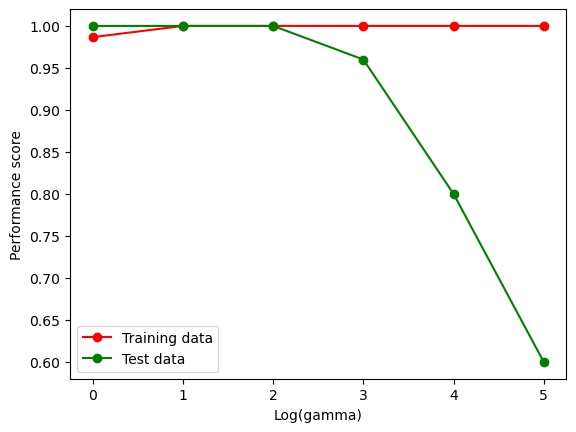

In [27]:
gamma_list = [0, 1, 2, 3, 4, 5 ]
score_train=[]
score_test=[]
for i in gamma_list:
    svm = SVC(kernel='rbf', C=100, gamma=1.0*10**i).fit(data_train,classes_train)
    score_train.append(svm.score(data_train, classes_train))
    score_test.append(svm.score(data_test, classes_test)) 
plt.plot(gamma_list, score_train, 'ro-', label="Training data")
plt.plot(gamma_list, score_test, 'go-', label="Test data")
plt.legend()
plt.xlabel('Log(gamma)')
plt.ylabel('Performance score')
plt.show()

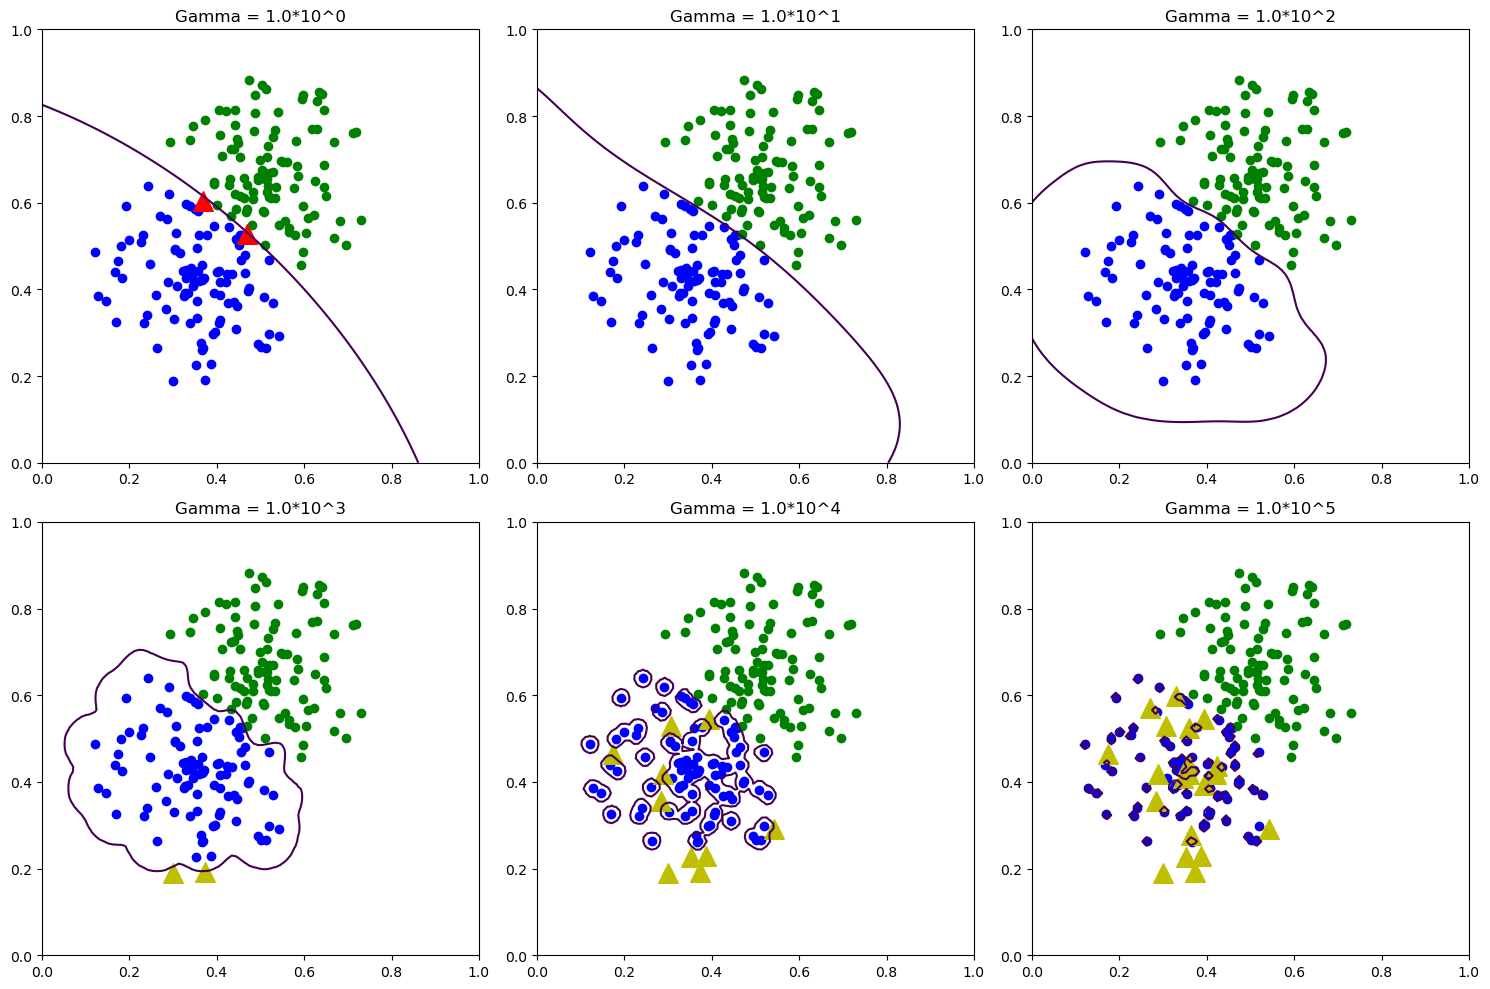

In [12]:
X1, X2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
X_grid = np.c_[X1.ravel(), X2.ravel()]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel() 

for i in range(6):
    svm = SVC(kernel='rbf', C=100, gamma=1.0*10**i).fit(data_train, classes_train)
    predictedclasses = svm.predict(data_train)
    predictedclassestest = svm.predict(data_test)
    decision_values = svm.decision_function(X_grid)

    ax = axes[i]
    for s in range(nclusters):
        ax.scatter(data_train[(predictedclasses == s), 0], data_train[(predictedclasses == s), 1], marker='o', color=color[s])
        ax.scatter(data_test[(predictedclassestest == s), 0], data_test[(predictedclassestest == s), 1], marker='o', color=color[s])
    ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0])

    ax.scatter(data_test[(predictedclassestest != classes_test), 0], data_test[(predictedclassestest != classes_test), 1], marker='^', color='y', s=200)
    ax.scatter(data_train[(predictedclasses != classes_train), 0], data_train[(predictedclasses != classes_train), 1], marker='^', color='r', s=200)

    ax.set_title(f'Gamma = 1.0*10^{i}')

plt.tight_layout()
plt.show()


#### <span style="color: red"> Task 2c:</span> Which value of `gamma` is optimal (2 marks)
In a markdown cell, state which of the above values of `gamma` you would choose and explain the reason for your choice.

I think the optimal gamma is 1e2. I made this choice because I think:

Compared to gamma=1e3, the predictive accuracy of the test set is higher when gamma=1e2. Meanwhile, as opposed to the unconverged boundaries at 1e1, the predicted boundaries have converged into closed curves at 1e2, which better aligns with the characteristics of the test and training set data. This reflects the clustering feature of the two datasets, where clusters have centers. 

When making a selection, to avoid underfitting or overfitting, the prediction results should reflect an appropriate number of training set features. The number of features represented by 1e1 is too few and does not reflect clustering, while the number of features included in the case of 1e3 is too many, resulting in some data in the subsequent test set being misclassified. This is also not ideal.

#### <span style="color: red"> Task 2d:</span> Fit your optimal svm and plot the decision boundary (2 marks)
Refit an svm to your training data using your chosen value for `gamma`, then produce a plot which includes a scatter plot of the test data (coloured according to class) and a line indicating the decision boundary for the svm. [Hint: see the class notebook for the code required to plot the decision boundary.]

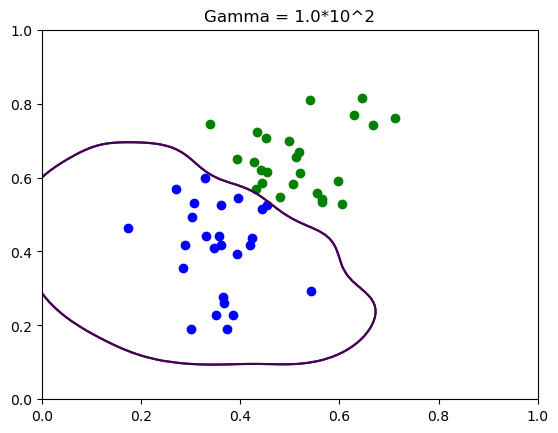

In [13]:
X1, X2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
X_grid = np.c_[X1.ravel(), X2.ravel()]
svm = SVC(kernel='rbf', C=100, gamma=1.0*10**2).fit(data_train,classes_train)
predictedclasses = svm.predict(data_train)
predictedclassestest = svm.predict(data_test)
decision_values = svm.decision_function(X_grid)
fill_levels = [decision_values.min()] + [0] + [
            decision_values.max()]
fig, ax = plt.subplots()
for s in range(nclusters):
    ax.scatter(data_test[(predictedclassestest == s), 0], data_test[(predictedclassestest == s), 1], marker='o', color=color[s])
    ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0])
    ax.set_title(f'Gamma = 1.0*10^{2}')
plt.show()

## Part 3 - An alternative classifier 

#### <span style="color: red"> Task 3:</span> Explore the use of an alternative classification algorithm (7 marks)
This part of the coursework will explore the use of functionality in Scikit Learn that you have not previously used. By now, you should be comfortable with using online resources to find out how to use new bits of python code. Please read the description of the task carefully and provide all of the output requested in order to achieve full marks.

You should use the `KNeighboursClassifier` to classify your dataset from earlier in the coursework, training with the training set and testing performance on the test set. You will need to explore how the performace varies with parameterisation of the classifier.

You should provide:

- A plot of the fraction of your training and test points correctly classified as a function of the number of neighbours used by the classifier with values ranging from 1 to 20;
- A statement of the optimum value of the number of neighbours for your data, including a brief explanation of your choice;
- A brief explanation of how the nearest-neighbours classifier works. Your explanation should contain no more than 50 words and should consist of complete sentences. This part is to test your ability to express scientific ideas precisely, yet concisely. Answers which have too many words or which are not full sentences will get zero.

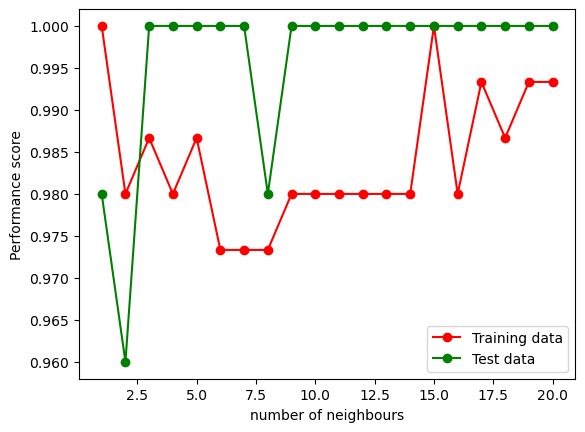

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier

neighbor_list = range(1,21)
score_train=[]
score_test=[]

for i in neighbor_list:
    knn = KNeighborsClassifier(n_neighbors=i).fit(data_train,classes_train)
    score_train.append(knn.score(data_train, classes_train))
    score_test.append(knn.score(data_test, classes_test)) 
    
plt.plot(neighbor_list, score_train, 'ro-', label="Training data")
plt.plot(neighbor_list, score_test, 'go-', label="Test data")
plt.legend()
plt.xlabel('number of neighbours')
plt.ylabel('Performance score')
plt.show()

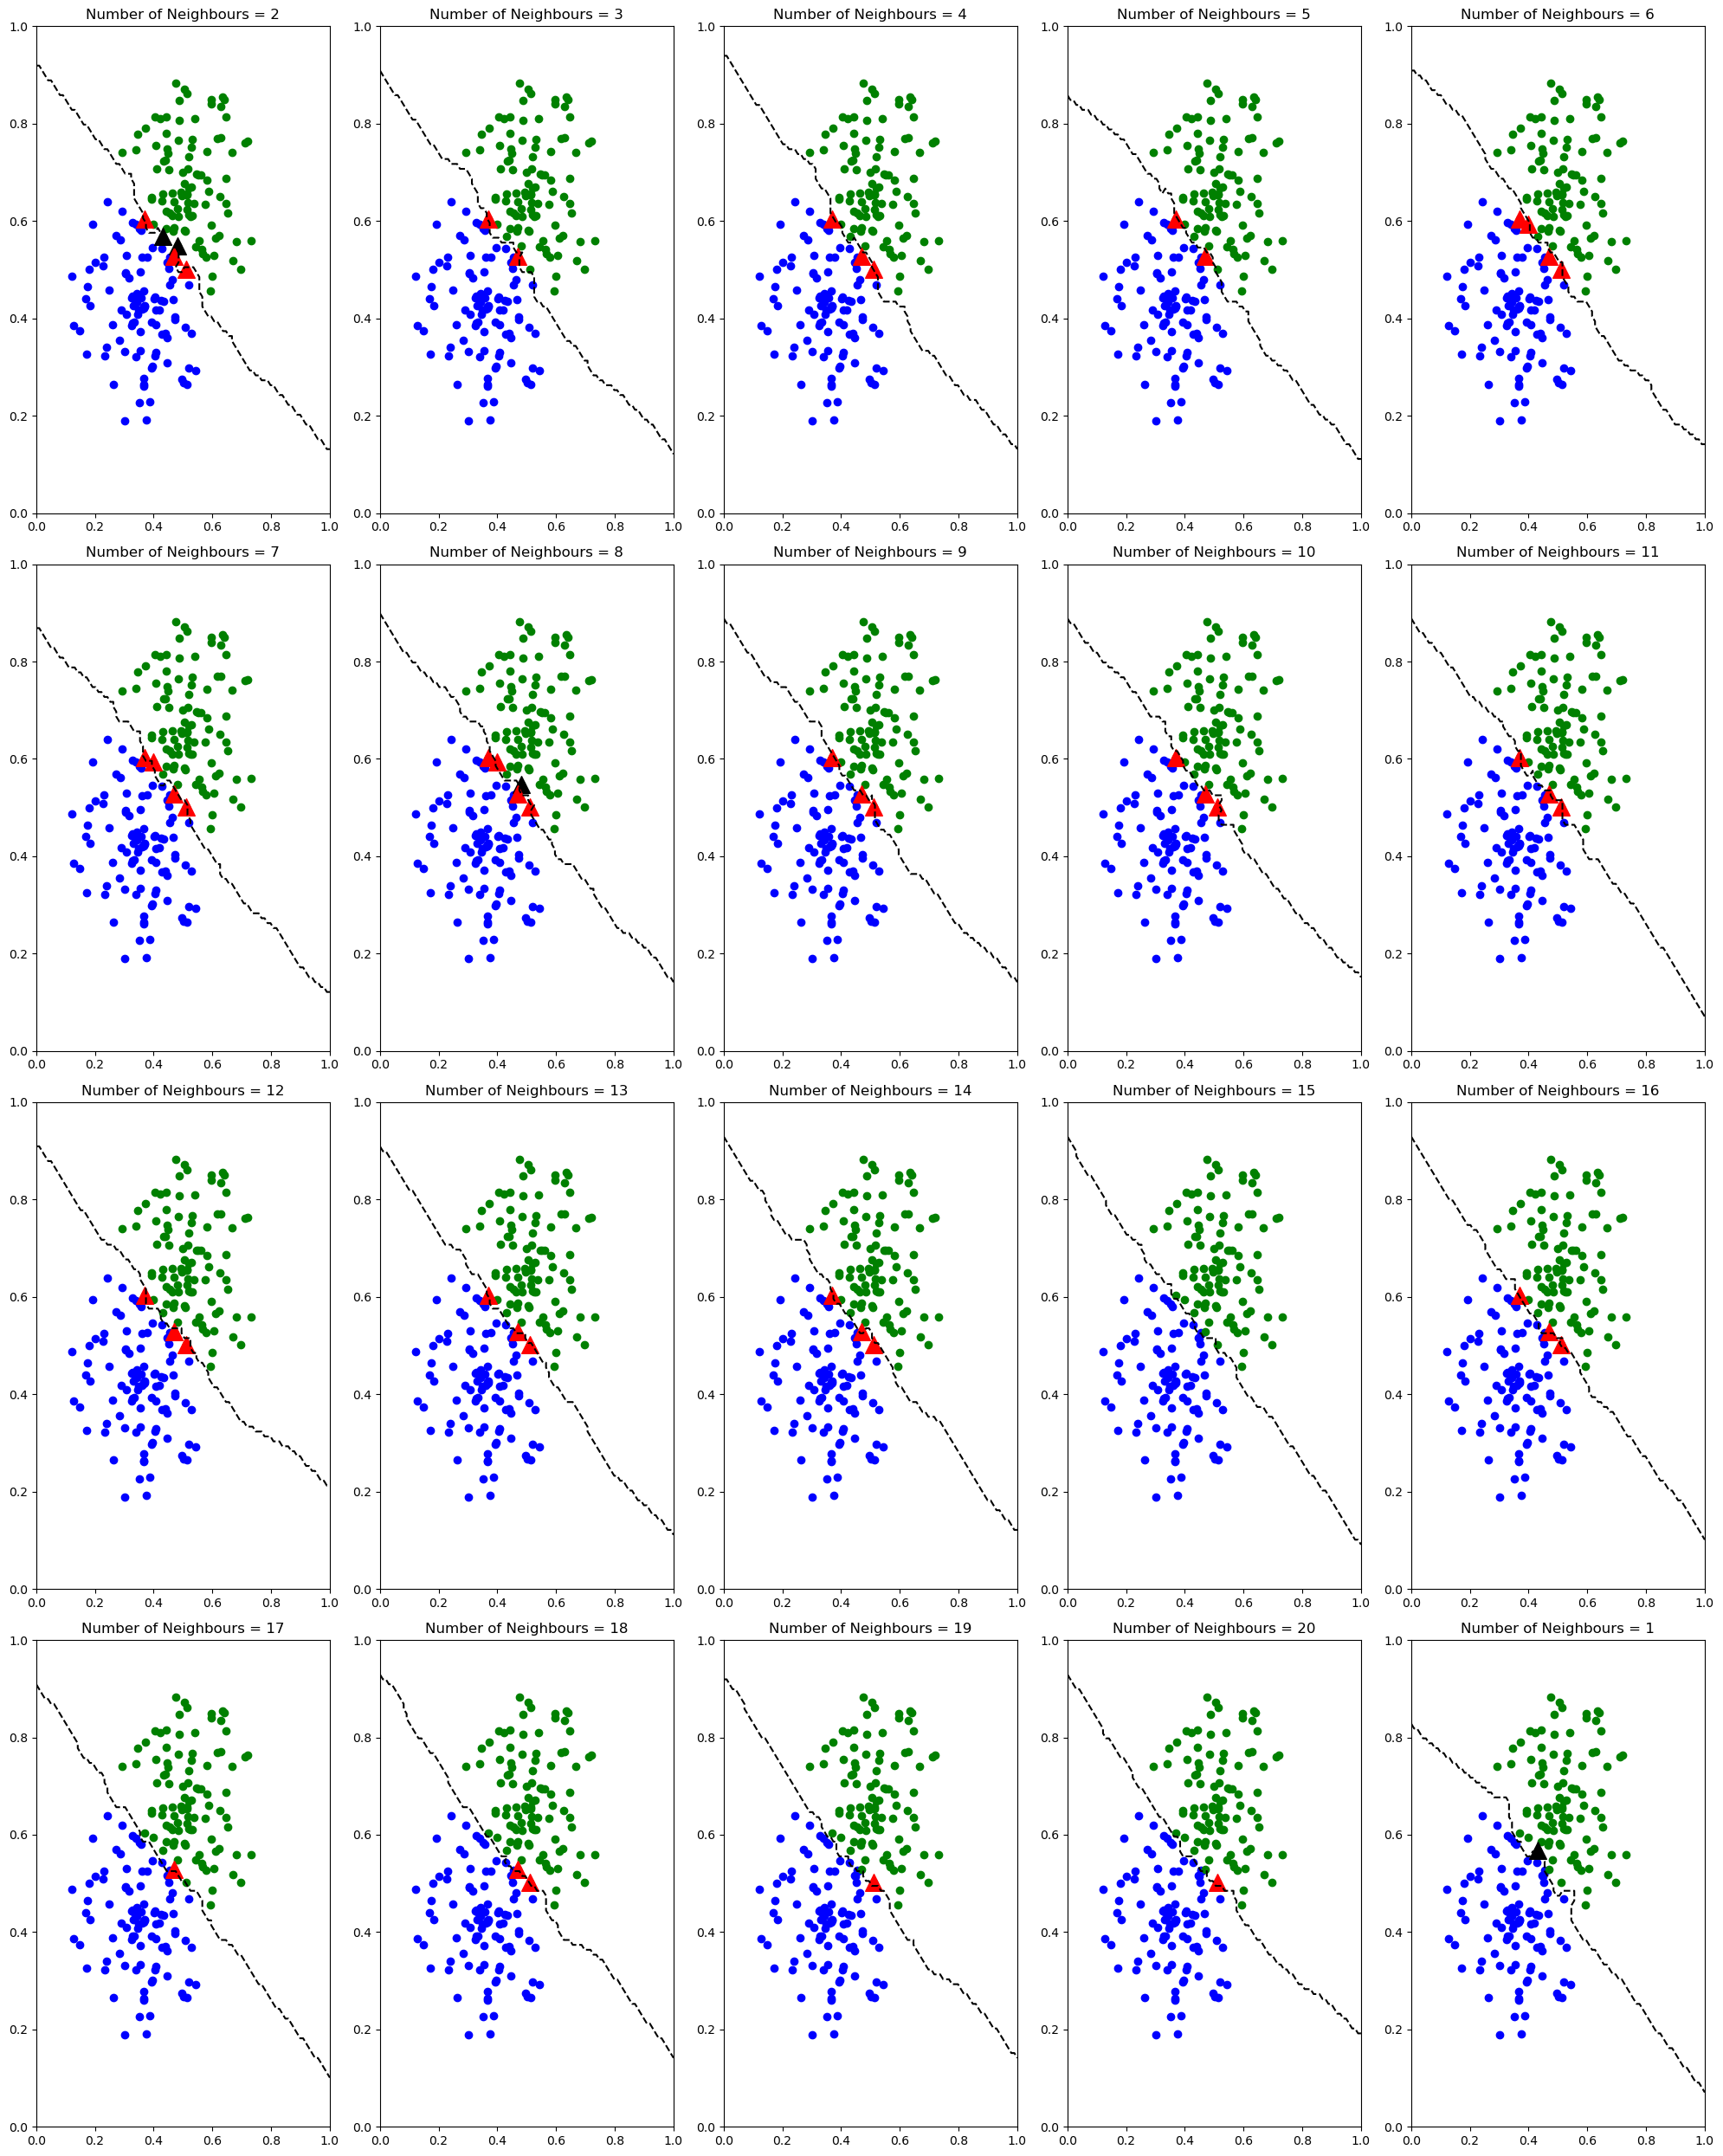

In [25]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(4, 5, figsize=(20, 25))
axes = axes.ravel()

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, classes_train)
    trainingpredict = knn.predict(data_train)
    testpredict = knn.predict(data_test)
    
 
    Z = knn.predict(X_grid).reshape(X1.shape)
    
    ax = axes[i-2]
    for s in range(nclasses):
        ax.scatter(data_train[(classes_train == s), 0], data_train[(classes_train == s), 1], marker='o', color=color[s])
        ax.scatter(data_test[(classes_test == s), 0], data_test[(classes_test == s), 1], marker='o', color=color[s])

    ax.contour(X1, X2, Z, levels=[0], colors='k', linestyles='--')

    ax.scatter(data_test[(testpredict != classes_test), 0], data_test[(testpredict != classes_test), 1], marker='^', color='k', s=200)
    ax.scatter(data_train[(trainingpredict != classes_train), 0], data_train[(trainingpredict != classes_train), 1], marker='^', color='r', s=200)
    
    ax.set_title(f'Number of Neighbours = {i}')

plt.tight_layout()
plt.show()


The best number og neibours is 20, this is because when n=20, 

### For use by markers only:

#### Total mark: $\hspace{1cm}$/25

#### As a percentage: